In [1]:
import numpy as np
import pandas as pd
import random as rn
import re
import nltk
import os

import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

from nltk.corpus import stopwords
from wordcloud import WordCloud

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 400)

In [2]:
rn.seed(a=42)
p = 0.004

df_reviews = pd.read_csv('Steam.csv', skiprows=lambda i: i > 0 and rn.random() > p)

print(df_reviews.shape)
display(df_reviews.head())

(25435, 5)


,app_id,app_name,review_txt,review_score,review_votes
0,10,Steam pro,Think you got skills because you came from CS:GO? Think you got skills cause you came from COD? Think you got skills cause you just bought fallout 4 and still got money left on your steam account? Well let me tell you a story. You're going to suck ♥♥♥. Alot of ♥♥♥.,1,1
1,10,games arena,"(I've deleted all the comments on this because I wanted to give a serious review about this game and delete my older one, so here ya go) This is the older Counter-Strike as most people know it. Some people usually don't find enjoyment in playing it due to it being either 'out-dated' or 'glitchy'. I personally tend to enjoy this game from time to time because it's an original game made from th...",1,0
2,10,sunwukong,Game will be played forever,1,0
3,10,Clash of clans,i can't stop playing :D,1,0
4,10,Steam pro,Good The best game,1,0


<Axes: xlabel='review_score', ylabel='count'>

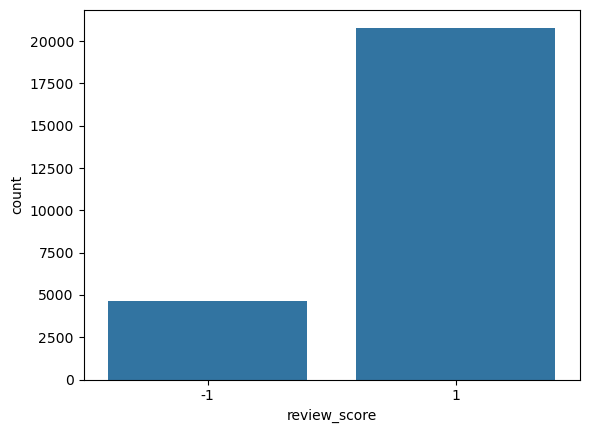

In [3]:
sns.countplot(x='review_score', data=df_reviews)

In [4]:
df_reviews['review_txt'] = df_reviews['review_txt'].astype(str)
df_reviews['review_votes'] = df_reviews['review_votes'].astype(str)

df_reviews.review_txt = df_reviews.review_txt.apply(lambda s: s.strip())

df_reviews_2 = df_reviews[df_reviews['review_score'].notnull()]

df_reviews_2['review_score'] = np.where(df_reviews_2['review_score'] == -1, 0, df_reviews_2['review_score'])

df_reviews_2.head()

,app_id,app_name,review_txt,review_score,review_votes
0,10,Steam pro,Think you got skills because you came from CS:GO? Think you got skills cause you came from COD? Think you got skills cause you just bought fallout 4 and still got money left on your steam account? Well let me tell you a story. You're going to suck ♥♥♥. Alot of ♥♥♥.,1,1
1,10,games arena,"(I've deleted all the comments on this because I wanted to give a serious review about this game and delete my older one, so here ya go) This is the older Counter-Strike as most people know it. Some people usually don't find enjoyment in playing it due to it being either 'out-dated' or 'glitchy'. I personally tend to enjoy this game from time to time because it's an original game made from th...",1,0
2,10,sunwukong,Game will be played forever,1,0
3,10,Clash of clans,i can't stop playing :D,1,0
4,10,Steam pro,Good The best game,1,0


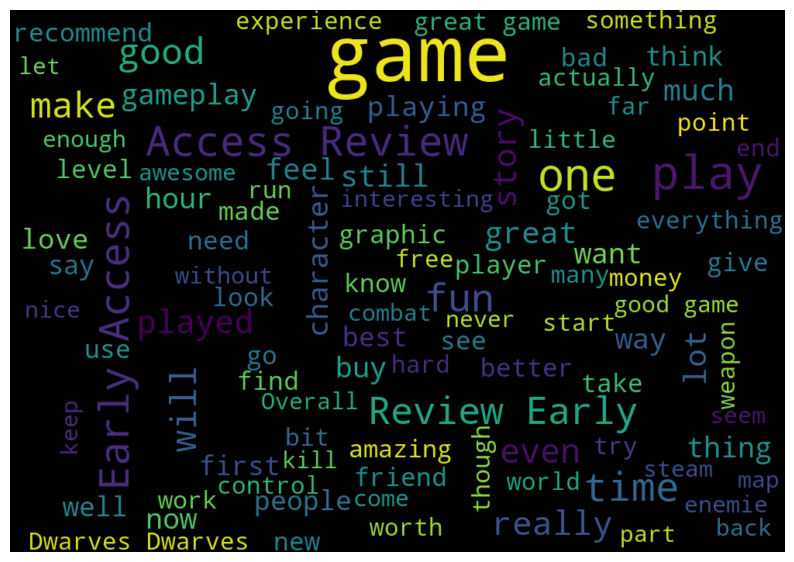

In [5]:
txt = ' '.join(rev for rev in df_reviews_2.review_txt)

plt.figure(figsize=(10, 10))

wordcloud = WordCloud(
    background_color='black',
    max_font_size=100,
    max_words=100,
    width=1000,
    height=700
).generate(txt)

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

In [6]:
df_reviews_2 = df_reviews_2[df_reviews_2.review_txt != 'Early Acess Review']
df_reviews_2 = df_reviews_2[~df_reviews_2.review_txt.isin(['nan'])]

df_reviews_2.drop_duplicates(['review_txt', 'review_score'], inplace=True)

print(df_reviews_2.shape)

(21180, 5)


In [7]:
df_reviews_2.head()

,app_id,app_name,review_txt,review_score,review_votes
0,10,Steam pro,Think you got skills because you came from CS:GO? Think you got skills cause you came from COD? Think you got skills cause you just bought fallout 4 and still got money left on your steam account? Well let me tell you a story. You're going to suck ♥♥♥. Alot of ♥♥♥.,1,1
1,10,games arena,"(I've deleted all the comments on this because I wanted to give a serious review about this game and delete my older one, so here ya go) This is the older Counter-Strike as most people know it. Some people usually don't find enjoyment in playing it due to it being either 'out-dated' or 'glitchy'. I personally tend to enjoy this game from time to time because it's an original game made from th...",1,0
2,10,sunwukong,Game will be played forever,1,0
3,10,Clash of clans,i can't stop playing :D,1,0
4,10,Steam pro,Good The best game,1,0


In [8]:
# Function to replace heart symbols
def replace_heart_with_PAD(text):
    return re.sub(r'[\u2665]+', '', text)  # Completely remove heart symbols

# function to remove imoges

In [9]:

def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

# cleaning some basic characters

In [10]:

def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

# clean numeric

In [11]:
def remove_num(texts):
    output = re.sub(r'\d + ', '', texts)
    return output

# clean white spaces

In [12]:
def unify_whitespaces(text):
    cleaned_string = re.sub(' +', ' ', text)
    return cleaned_string

# func to remove symbol

In [13]:
def remove_symbol(x):
    cleaned_string = re.sub(r'[^a-zA-Z0-9?!.,] + ', ' ', x)
    return cleaned_string

# remove punctuations

In [14]:

def remove_punctuation(text):
    result = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',',') )
    return result

# remove stopwords

In [15]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download necessary data
nltk.download('stopwords')

# Define stopword set, stemmer, and lemmatizer
stop = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()

def remove_stopwords(text):
    if not isinstance(text, str):  # Ensure input is a string
        return ""

    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return ' '.join(text)

[nltk_data] Downloading package stopwords to C:\Users\Ramsaheb
[nltk_data]     Prasad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# function to use stemming to normalize words

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Ensure necessary downloads
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords globally
stop_words = set(stopwords.words('english'))

def Stemming(text):
    """Perform stemming on text while removing stopwords."""
    if not isinstance(text, str):  # Ensure input is a string
        return ""

    snowball_stemmer = SnowballStemmer('english')
    word_tokens = word_tokenize(text)

    # Use 'stop_words' instead of redefining 'stopwords'
    stemmed_words = [snowball_stemmer.stem(word) for word in word_tokens if word.lower() not in stop_words]
    
    return ' '.join(stemmed_words)


[nltk_data] Downloading package stopwords to C:\Users\Ramsaheb
[nltk_data]     Prasad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ramsaheb
[nltk_data]     Prasad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# applying all the cleaning util methods

In [17]:
def cleaning(df, review):
    df_preprocessed = df.copy()
    df_preprocessed[review] = df_preprocessed['review_txt']
    df_preprocessed[review] = df_preprocessed[review].apply(deEmojify)
    df_preprocessed[review] = df_preprocessed[review].apply(clean)
    df_preprocessed[review] = df_preprocessed[review].apply(remove_num)
    df_preprocessed[review] = df_preprocessed[review].apply(unify_whitespaces)
    #df_preprocessed[review] = df_preprocessed[review].apply(remove_symbol)
    df_preprocessed[review] = df_preprocessed[review].apply(remove_punctuation)
    df_preprocessed[review] = df_preprocessed[review].apply(remove_stopwords)
    df_preprocessed[review] = df_preprocessed[review].apply(Stemming)
    df_preprocessed[review] = df_preprocessed[review].apply(replace_heart_with_PAD)  # Apply here
    return df_preprocessed

df_preprocessed = cleaning(df_reviews_2, 'review_txt_clean')

In [18]:
df_preprocessed.head(2)

,app_id,app_name,review_txt,review_score,review_votes,review_txt_clean
0,10,Steam pro,Think you got skills because you came from CS:GO? Think you got skills cause you came from COD? Think you got skills cause you just bought fallout 4 and still got money left on your steam account? Well let me tell you a story. You're going to suck ♥♥♥. Alot of ♥♥♥.,1,1,think got skill came csgo think got skill caus came cod think got skill caus bought fallout 4 still got money left steam account well let tell stori go suck alot
1,10,games arena,"(I've deleted all the comments on this because I wanted to give a serious review about this game and delete my older one, so here ya go) This is the older Counter-Strike as most people know it. Some people usually don't find enjoyment in playing it due to it being either 'out-dated' or 'glitchy'. I personally tend to enjoy this game from time to time because it's an original game made from th...",1,0,( ve delet comment want give serious review game delet older one ya go ) older counter-strik peopl know peopl usual find enjoy play due either out-dat ' glitchi ' person tend enjoy game time time origin game made first sourc engin old school shooter general ai n't shabbi either due game small amount space fill comput rare ever lag make sure interrupt enjoy also competit present counter-strik g...


In [19]:
neg_reviews = df_preprocessed[df_preprocessed.review_score == 0]
neg_reviews = neg_reviews.sample(n=len(df_preprocessed), replace=True, random_state=1234)
all_intents = neg_reviews.review_txt_clean.tolist()
print(neg_reviews.shape)

(21180, 6)


In [20]:
neg_reviews.head(2)

,app_id,app_name,review_txt,review_score,review_votes,review_txt_clean
19111,370100,games arena,"This. Game. Sucks. I alrady have a game, quite like it, that I got for FREE. This game may not cost much, but it's not worth the 27 cents i paid. The zombies are few and far between, shooting doesn't even attract them, they can survive multiple shotgun shots to the face, and they look like minecraft villages with green make-up. So, all-in-all, 1/10 IGN 'Would not recommend.'",0,0,game suck alradi game quit like got free game may cost much worth 27 cent paid zombi far shoot even attract surviv multipl shotgun shot face look like minecraft villag green make-up all-in-al 1/10 ign would recommend '
4732,218740,sunwukong,"Another overpriced, and boring platform game... Why is this even 10€? There are loads of games that are better than this thing right here, seroiusly, why would you pay for a game like this? Im not recommending this to anyone, even when its 80% off, its just ♥♥♥♥ing stupid.",0,0,anoth overpr bore platform game even 10€ load game better thing right seroiusli would pay game like im recommend anyon even 80 % ing stupid


In [21]:
all_sents = []

for intent in all_intents:
    for sent in nltk.sent_tokenize(intent):
        if len(sent.split()) > 4:
            all_sents.append(sent)

print(len(all_sents))

all_intent = all_sents

18562


# sentence embedding

In [22]:
from sentence_transformers import SentenceTransformer
import tensorflow as tf

In [23]:
def embed(model, model_type, sentences):
    if model_type == 'use':
        embeddings = model(sentences)

    elif model_type == 'sentence transformer':
        embeddings = model.encode(sentences)

    return embeddings

model_st1 = SentenceTransformer('all-mpnet-base-v2')
embeddings_st1 = embed(model_st1, 'sentence transformer', all_intents)

In [24]:
embeddings_st1.shape

(21180, 768)

# Dimensionality reduction

In [25]:
import umap
import hdbscan
from functools import partial 

from hyperopt import fmin, hp, tpe, STATUS_OK, space_eval, Trials

In [50]:
def generate_cluster(message_embeddings, n_neighbors, n_components, min_cluster_size, min_samples=None, random_state=None):
    umap_embeddings = (umap.UMAP(n_neighbors=n_neighbors, n_components=n_components, metric='cosine', random_state=random_state)).fit_transform(message_embeddings)
    clusters = hdbscan.HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=min_samples,
        metric='euclidean',
        gen_min_span_tree=True,
        cluster_selection_method='eom'
    ).fit(umap_embeddings)

    return clusters

# use bayesian optimization with hyperopt


In [51]:
def score_clusters(clusters, prob_threshold=0.05):
    cluster_labels = clusters.labels_

    label_count = len(np.unique(cluster_labels))
    total_num = len(clusters.labels_)

    cost = np.count_nonzero(clusters.probabilities_ < prob_threshold) / total_num

    return label_count, cost

In [52]:
def objective(params, embeddings, label_lower, label_upper):
    clusters = generate_cluster(
        embeddings, 
        n_neighbors=params['n_neighbors'],
        n_components=params['n_components'], 
        min_cluster_size=params['min_cluster_size'],
        random_state=params['random_state']  # Fixed typo
    )

    label_count, cost = score_clusters(clusters, prob_threshold=0.05)

    penalty = 1.0 if (label_count < label_lower) or (label_count > label_upper) else 0

    loss = cost + penalty

    return {'loss': loss, 'label_count': label_count, 'status': STATUS_OK}


In [53]:
def bayesian_search(embeddings, space, label_lower, label_upper, max_evals=100):
    trials = Trials()
    fmin_objective = partial(
        objective,
        embeddings=embeddings,
        label_lower=label_lower,
        label_upper=label_upper
    )
    best = fmin(
        fmin_objective, 
        space=space, 
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials
    )
    best_params = space_eval(space, best)
    print('best params:', best_params)
    print(f"label count: {trials.best_trial['result']['label_count']}")

    best_clusters = generate_cluster(
        embeddings, 
        n_neighbors=best_params['n_neighbors'],
        n_components=best_params['n_components'], 
        min_cluster_size=best_params['min_cluster_size'],
        random_state=best_params['random_state']  # Fixed typo
    )

    return best_params, best_clusters, trials


In [54]:
hspace = {
    "n_neighbors": hp.choice('n_neighbors', range(3,32)),
    "n_components": hp.choice('n_components', range(3,32)),
    "min_cluster_size": hp.choice('min_cluster_size', range(2,32)),
    "random_state": hp.choice('random_state', [42])  # Fixed issue
}

label_lower = 10
label_upper = 100
max_evals = 25  

In [ ]:
best_params_use, best_clusters_use, trials_use = bayesian_search(
    embeddings_st1, 
    space=hspace, 
    label_lower=label_lower, 
    label_upper=label_upper, 
    max_evals=max_evals
)

In [ ]:
c = 11

for index, clust in enumerate(best_clusters_use.labels_):
    if clust == c:
        print(all_intent[index])

# automatic cluster labeling

In [2]:
import spacy
import collections
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
data_cluster = pd.DataFrame(data=list(zip(all_intents, best_clusters_use, labels_)), columns=['text', 'label_st1'])
data_cluster.head(2)

In [ ]:
example_category = data_cluster[data_cluster['label_st1'] == 2].reset_index(drop=True)
example_category.head()

In [ ]:
from collections import Counter

sent_with_word_lemma = []

for intent in all_intents:
    doc = nlp(intent)
    temp_sentence = ''
    this_one = Flase
    for token in doc:
        if (token.pos_ in ['VERB', 'NOUN', 'ADJ'] or (token.dep_ == 'dobj')):
            temp_sentence += token.lemma_.lower() + ' '

    sent_with_word_lemma.append(temp_sentence)


In [ ]:
def compute_IDF(documents):
    """
    Computes the IDF (Inverse Document Frequency) values for words in a collection of documents.

    Args:
        documents (List[str]): List of documents.

    Returns:
        dict: Dictionary mapping words to their IDF values.

    """
    word_count = Counter()
    for doc in documents:
        if 'drops(players' in doc:
            print(doc)
        word_set = set(doc.split())
        word_count.update(word_set)
    # print(word_count)
    total = sum(word_count.values())
    word_IDF = {k : round(( np.log2(total / v ) )) for k, v in word_count.items() }
    return word_IDF

word_IDF = compute_IDF(sent_with_word_lemma)
word_IDF

# Automatic cluster labeling
**Here we’ll concatenate the most common verb, direct object, and top two nouns from each cluster for our Automatic cluster labeling.**

In [ ]:
def get_group(df, category_col, category ):
    """
    The get_group function takes a DataFrame (df), a category column name (category_col), and a category value (category) as inputs. It filters the DataFrame based on the specified category and returns a subset of the DataFrame containing only the rows with that category.

    Args:
        df (pd.DataFrame): DataFrame to filter.
        category_col (str): Name of the column containing the category.
        category: Category value to filter on.

    Returns:
        pd.DataFrame: Subset of the DataFrame with the specified category.

    """
    single_category = df[df[category_col] == category ].reset_index(drop = True)
    return single_category


def most_common(lst, n_words ):
    """
    This function takes a list of words (lst) and the number of top common words to return (n_words). It uses the collections.Counter class to count the occurrences of each word in the list. If a word appears more than once (counter[k] > 1), it multiplies its count by the corresponding IDF value (word_IDF[k]). Finally, the function returns a list of tuples representing the n most common words and their counts, obtained using the counter.most_common(n_words) method.
    
    Arguments:
        lst: list, each element is a word
        n_words: number of top common words to return
    
    Returns:
        counter.most_common(n_words): counter object of n most common words
    """
    counter = collections.Counter(lst)
    for k in list(counter):
        if counter[k] == 1:
            pass
        else:
            counter[k] *= word_IDF[k]
            
    return counter.most_common(n_words)

In [ ]:
def extract_labels(category_doc, print_word_counts = False):
    ''' 
    Argument:
        category_docs: list of documents, all from the same category or clustering. category_docs is a list of strings like below 
        ['fun game small amount time unless lifer..........', ....  'steem pile graphic' ]
        
        print_word_counts: bool, True will print word counts of each type in this category
    '''
    
    verbs = []
    dobjs = []
    nouns = []
    adjs = []
    
    verb = ''
    dobj = ''
    noun1 = ''
    noun2 = ''
    
    for i in range(len(category_doc)):
        doc = nlp(category_doc[i])
        for token in doc:
            if (token.is_stop == False ) and (len(str(token).strip()) >0 ):
                if token.pos_ == 'VERB':
                    verbs.extend([token.lemma_.lower()])
                
                elif token.dep_ == 'dobj':
                    dobjs.extend([token.lemma_.lower()])
                    
                elif token.pos_ == 'NOUN':
                    nouns.extend([token.lemma_.lower()])
                    
                elif token.pos_ == 'ADJ':
                    adjs.extend([token.lemma_.lower()])
                    
    
    # print('most_common(verbs, 1) ', most_common(verbs, 1))
    # [('m', 27)]
    
    if print_word_counts:
        for word_lst in [verbs, dobjs, nouns, adjs]:
            counter = collections.Counter(word_lst)
            print(counter)
            
    if len(verbs) > 0:
        verb = most_common(verbs, 1)[0][0]
        
    if len(dobjs) > 0:
        dobj = most_common(dobjs, 1)[0][0]
        
    if len(nouns) > 0:
        noun1 = most_common(nouns, 1)[0][0]
    
    if len(set(nouns)) > 1:
        noun2 = most_common(nouns, 2)[1][0]
        
        
    # concatenate the most common verb-dobj-noun1-noun2 (if they exist)
    label_words = [verb, dobj]
    
    for word in [noun1, noun2]:
        if word not in label_words:
            label_words.append(word)
            
    if '' in label_words:
        label_words.remove('')
        
    label = '_'.join(label_words)
    
    return label          
                    
        
        

In [ ]:
current_cat = ['fun game small amount time unless lifer mean insult anyon peopl time other like anyon job kid liter anyth play video game time game made mistak play way mani hour never get past week game explain noth start understand go read watch guid even could random bad luck like spawn world row rain none stop froze death spawn summer die heat within minut game even tell take damag read guid hey im glad peopl like game unless consid hardcor gamer would avoid time sink', 'game look nice slow pace even adventur', 'good remak sound still origin half life rework sourc minus excel graphic sourc im say game bad say inferior origin that avail steam reason say unlik half life half life sourc includ hd mode hd mode basic origin hd pack includ releas blueshift made npcs weapon look consider better real advantag half life sourc origin stabl engin say there anyth wrong gold sourc engin get rid glitch origin end half life sourc realli isnt much improv origin half life improv ps actual think graphic blurri person opinion', 'game interest tower defens mechan primit bore gameplay cool theme', 'want zombi surviv game buy dayz', 'full twelv year old spammer time waister cours drop out start game like game alot player immposs get game togeth without spam cuss leav game report noth develop joke want money take action keep claim im fed crap someth game hard find decent game good develop priceybut get pay ehh', 'find wait line forev join battl rare final get spot join battl actual pretti fun good game play want give wait forev', 'gta iv fantast game stori onlin great reconmen game issu run modern hardwar window run window might alright might issu', 'steem pile graphic' ]


x = extract_labels(current_cat)
x

In [ ]:

list(get_group(data_clustered, 'label_st1', 18 )['text'])

In [ ]:
def apply_and_summarize_labels(df, category_col ):
    """
    Assign groups to original documents and provide group counts

    Arguments:
        df: pandas dataframe of original documents of interest to
            cluster
        category_col: str, column name corresponding to categories or clusters

    Returns:
        summary_df: pandas dataframe with model cluster assignment, number
                    of documents in each cluster and derived labels
    """
    
    numerical_labels = df[category_col].unique()
    
    label_dict = {}
    
    for label in numerical_labels:
        current_category = list(get_group(data_clustered, category_col, label )['text'])
        
        label_dict[label] = extract_labels(current_category)
        
    summary_df = (df.groupby(category_col)['text'].count()
                  .reset_index()
                  .rename(columns={'text' : 'count' })
                  .sort_values('count', ascending = False )
                  )
    
    summary_df['label'] = summary_df.apply(lambda x: label_dict[x[category_col]] , axis = 1 )
    
    return summary_df

In [ ]:

cluster_summary = apply_and_summarize_labels(data_clustered, 'label_st1' )
cluster_summary

In [ ]:
# import numpy as np
# import pandas as pd
# import random as rn
# import re
# import nltk
# import os

# import matplotlib.pyplot as plt
# import seaborn as sns
# from plotly import graph_objs as go
# import plotly.express as px
# import plotly.figure_factory as ff

# from nltk.corpus import stopwords
# from wordcloud import WordCloud

# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# pd.set_option('display.max_rows', 600)
# pd.set_option('display.max_columns', 500)
# pd.set_option('max_colwidth', 400)

# # Set seed for reproducibility
# rn.seed(a=42)
# p = 0.004

# # Load data
# df_reviews = pd.read_csv('Steam.csv', skiprows=lambda i: i > 0 and rn.random() > p)

# print(df_reviews.shape)
# display(df_reviews.head())

# # Plot review score distribution
# sns.countplot(x='review_score', data=df_reviews)

# # Prepare the reviews data
# df_reviews['review_txt'] = df_reviews['review_txt'].astype(str)
# df_reviews['review_votes'] = df_reviews['review_votes'].astype(str)
# df_reviews.review_txt = df_reviews.review_txt.apply(lambda s: s.strip())

# df_reviews_2 = df_reviews[df_reviews['review_score'].notnull()]
# df_reviews_2['review_score'] = np.where(df_reviews_2['review_score'] == -1, 0, df_reviews_2['review_score'])

# # Remove invalid reviews
# df_reviews_2 = df_reviews_2[df_reviews_2.review_txt != 'Early Acess Review']
# df_reviews_2 = df_reviews_2[~df_reviews_2.review_txt.isin(['nan'])]
# df_reviews_2.drop_duplicates(['review_txt', 'review_score'], inplace=True)

# # WordCloud visualization
# txt = ' '.join(rev for rev in df_reviews_2.review_txt)
# plt.figure(figsize=(10, 10))
# wordcloud = WordCloud(
#     background_color='black',
#     max_font_size=100,
#     max_words=100,
#     width=1000,
#     height=700
# ).generate(txt)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

# # Function to replace heart symbols
# def replace_heart_with_PAD(text):
#     return re.sub(r'[\u2665]+', '', text)  # Completely remove heart symbols

# # Function to remove emojis
# def deEmojify(x):
#     regrex_pattern = re.compile(pattern = "["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                        "]+", flags = re.UNICODE)
#     return regrex_pattern.sub(r'', x)

# # Cleaning functions
# def clean(raw):
#     """ Remove hyperlinks and markup """
#     result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
#     result = re.sub('&gt;', "", result)
#     result = re.sub('&#x27;', "'", result)
#     result = re.sub('&quot;', '"', result)
#     result = re.sub('&#x2F;', ' ', result)
#     result = re.sub('<p>', ' ', result)
#     result = re.sub('</i>', '', result)
#     result = re.sub('&#62;', '', result)
#     result = re.sub('<i>', ' ', result)
#     result = re.sub("\n", '', result)
#     return result

# # Function to remove numeric values
# def remove_num(texts):
#     output = re.sub(r'\d+', '', texts)
#     return output

# # Function to unify whitespaces
# def unify_whitespaces(text):
#     cleaned_string = re.sub(' +', ' ', text)
#     return cleaned_string

# # Function to remove non-alphabetic symbols
# def remove_symbol(x):
#     cleaned_string = re.sub(r'[^a-zA-Z0-9?!.,]+', ' ', x)
#     return cleaned_string

# # Function to remove punctuations
# def remove_punctuation(text):
#     result = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', ','))
#     return result

# # Function to remove stopwords
# from nltk.stem import WordNetLemmatizer, PorterStemmer
# nltk.download('stopwords')
# stop = set(stopwords.words('english'))
# stemmer = PorterStemmer()
# lemma = WordNetLemmatizer()

# def remove_stopwords(text):
#     if not isinstance(text, str):  # Ensure input is a string
#         return ""
#     text = [word.lower() for word in text.split() if word.lower() not in stop]
#     return ' '.join(text)

# # Stemming function
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import SnowballStemmer
# from nltk.tokenize import word_tokenize
# nltk.download('punkt')

# stop_words = set(stopwords.words('english'))

# def Stemming(text):
#     """Perform stemming on text while removing stopwords."""
#     if not isinstance(text, str):  # Ensure input is a string
#         return ""
#     snowball_stemmer = SnowballStemmer('english')
#     word_tokens = word_tokenize(text)
#     stemmed_words = [snowball_stemmer.stem(word) for word in word_tokens if word.lower() not in stop_words]
#     return ' '.join(stemmed_words)

# # Cleaning pipeline
# def cleaning(df, review):
#     df_preprocessed = df.copy()
#     df_preprocessed[review] = df_preprocessed['review_txt']
#     df_preprocessed[review] = df_preprocessed[review].apply(deEmojify)
#     df_preprocessed[review] = df_preprocessed[review].apply(clean)
#     df_preprocessed[review] = df_preprocessed[review].apply(remove_num)
#     df_preprocessed[review] = df_preprocessed[review].apply(unify_whitespaces)
#     df_preprocessed[review] = df_preprocessed[review].apply(remove_punctuation)
#     df_preprocessed[review] = df_preprocessed[review].apply(remove_stopwords)
#     df_preprocessed[review] = df_preprocessed[review].apply(Stemming)
#     df_preprocessed[review] = df_preprocessed[review].apply(replace_heart_with_PAD)  # Apply heart replacement
#     return df_preprocessed

# # Apply cleaning pipeline
# df_preprocessed = cleaning(df_reviews_2, 'review_text_clean')

# # Show the cleaned data
# df_preprocessed.head(1)


# adding names to the columns

In [ ]:
# df = pd.read_csv('steam.csv')

# df.columns = ['app_id', 'review_txt', 'review_score', 'review_votes']

# app_names = ['Steam pro', 'COD', 'Clash of clans', 'sunwukong', 'games arena']

# df['app_name'] = [rn.choice(app_names) for _ in range(len(df))]

# df = df[['app_id', 'app_name', 'review_txt', 'review_score', 'review_votes']]

# df.to_csv('Steam.csv', index=False)